# 손실함수

In [1]:
import numpy as np

# warning 무시
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

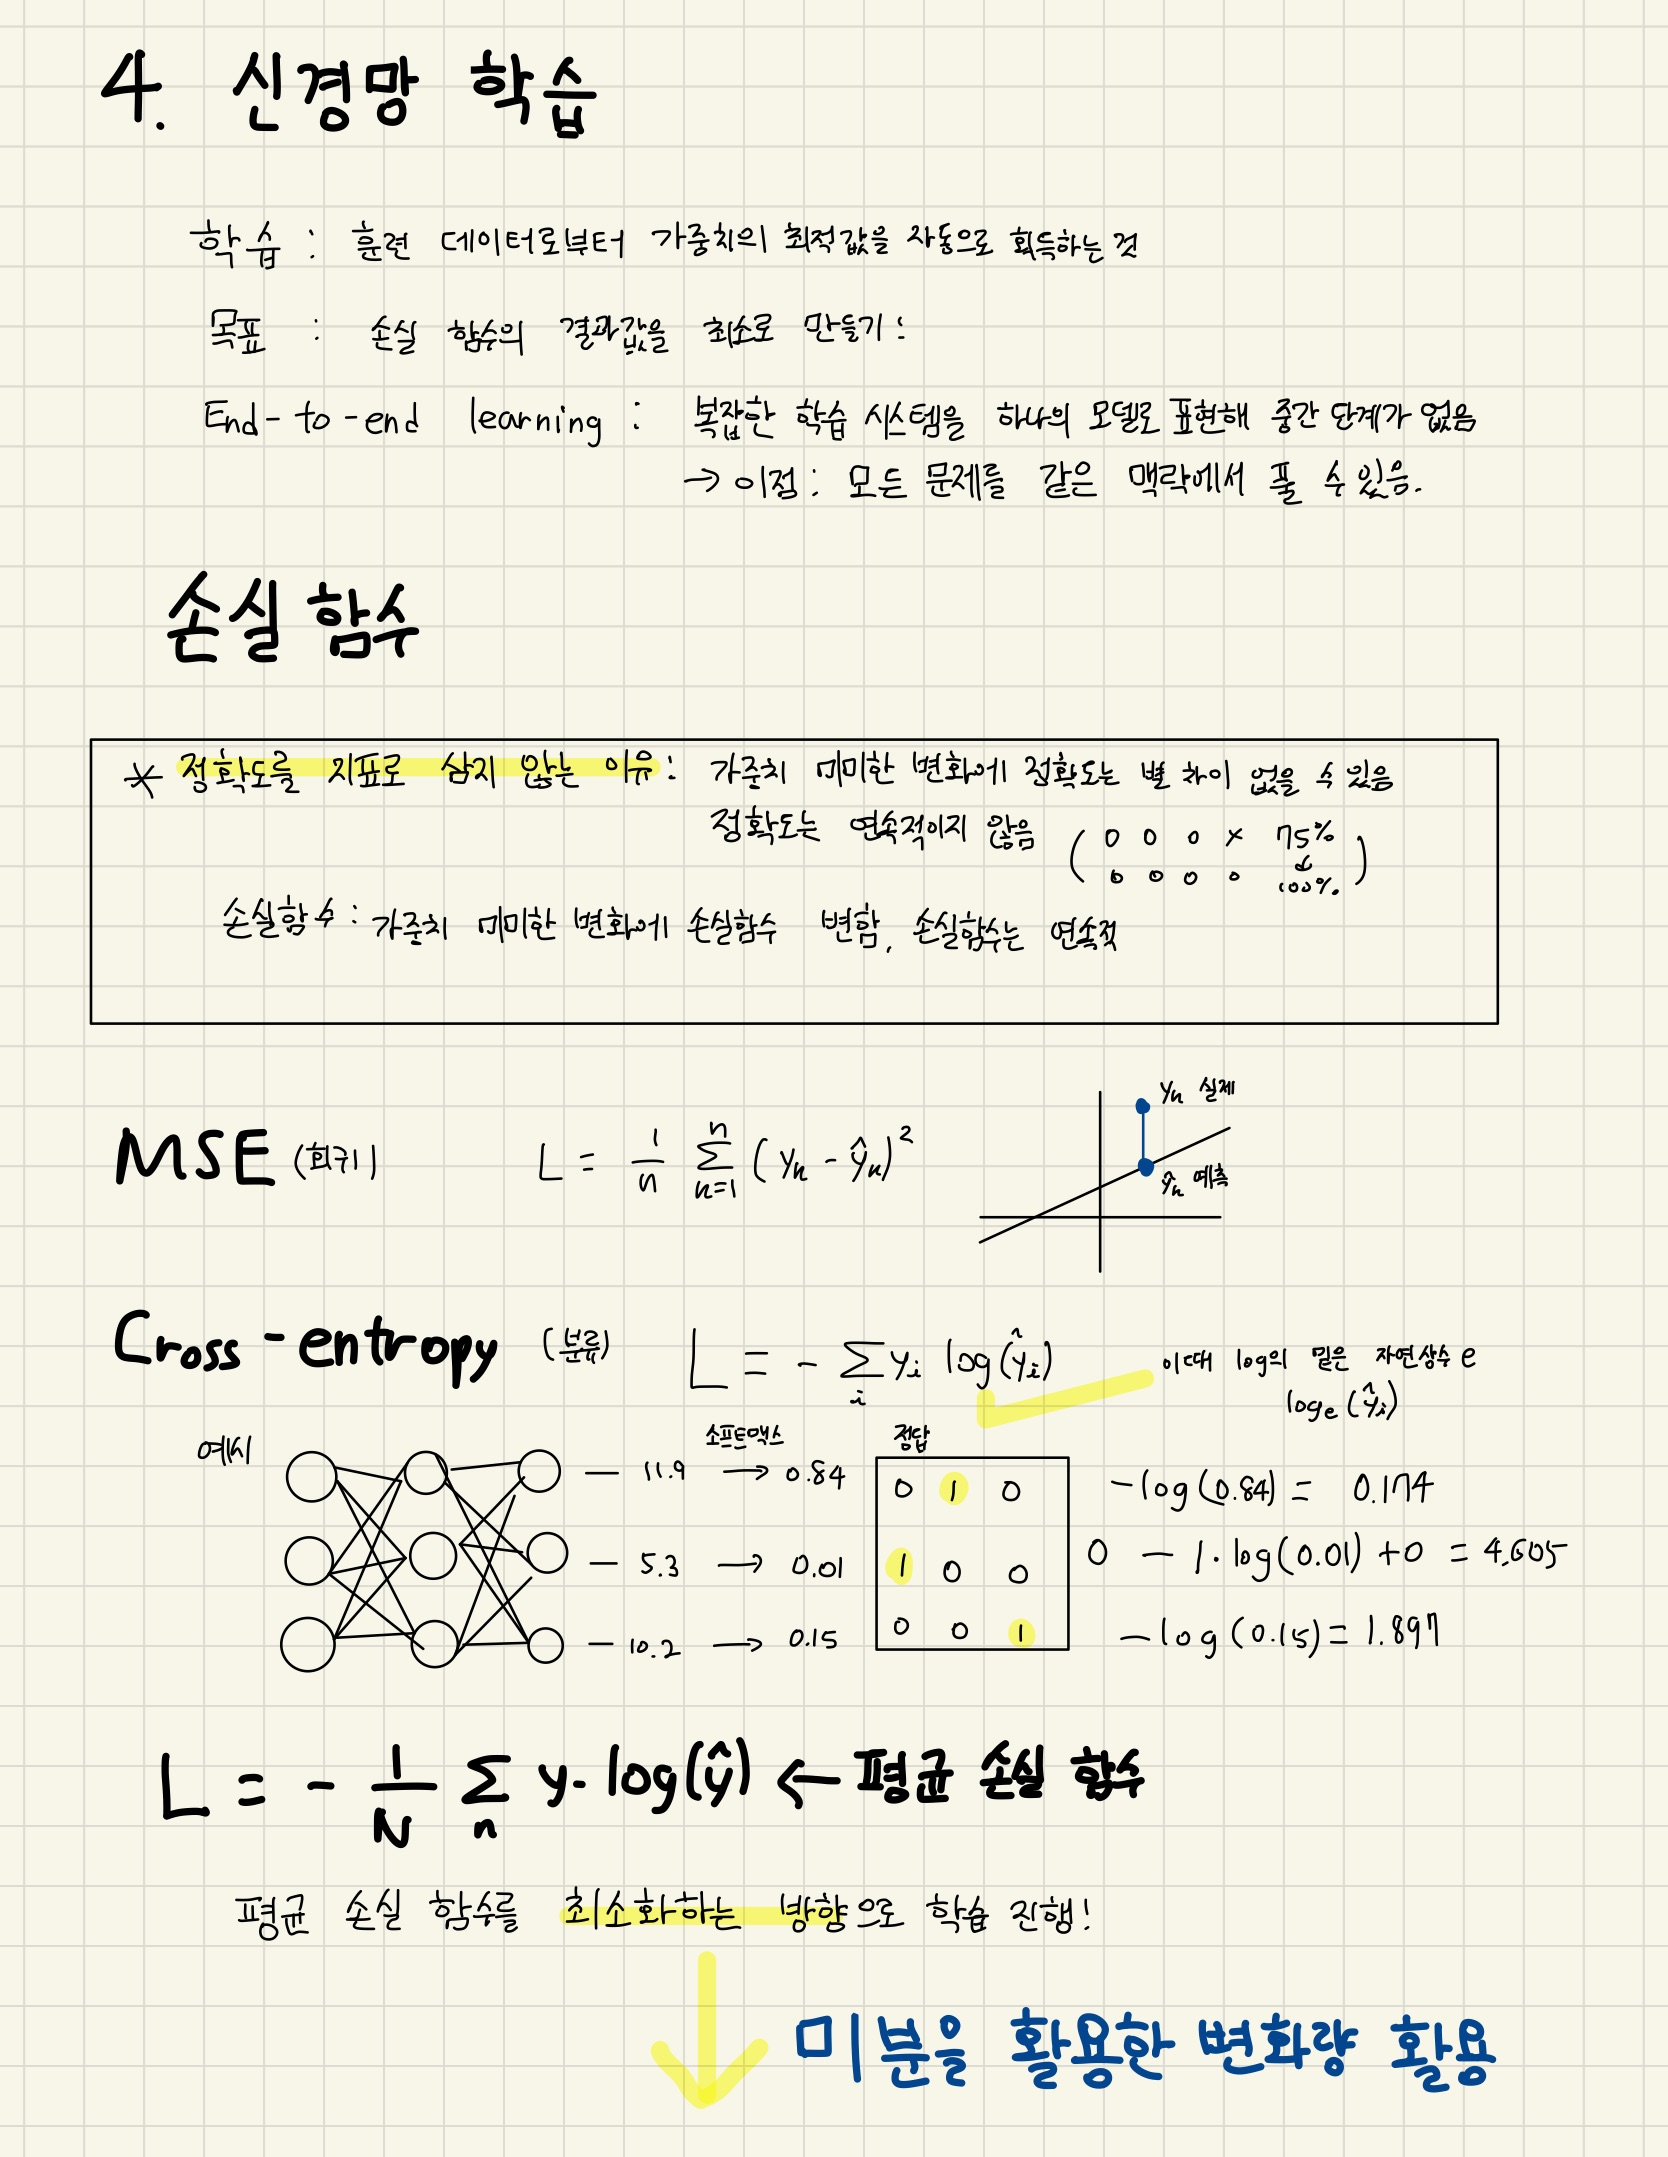

### 1. MSE(Mean Squared Error) - 회귀

In [2]:
def mse_loss( y_hat, y ):
    return np.mean( (y - y_hat)**2 )

In [3]:
y = np.random.random( 4 )
y_hat = np.random.random( 4 )

print(y)
print(y_hat)
print('loss =', mse_loss( y_hat, y ))

[0.74488035 0.85945942 0.92007337 0.2494655 ]
[0.2847171  0.74314725 0.73358061 0.01887448]
loss = 0.07830762507176911


### 2. Cross-Entropy - 분류

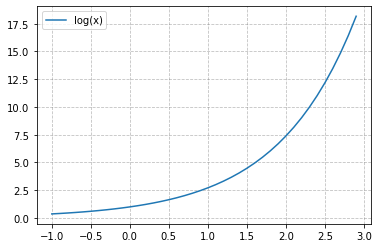

In [4]:
# 자연상수를 밑으로 가지는 log 함수
x = np.arange(-1,3,0.1)
amplitude = np.exp(x)
plt.grid(color = "gray", alpha=.5,linestyle='--')
plt.plot(x,amplitude,label='log(x)')
plt.legend()
plt.show()

In [5]:
def ce_loss( y_hat, y ):
    delta = 1e-7
    # log(0)이 나와 무한대가 되지 않도록 delta를 더함
    return - np.sum( y * np.log(y_hat + delta) )

In [6]:
y_hat = np.array( [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] )
y = np.array( [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] )

ce_loss( y_hat, y )

0.510825457099338

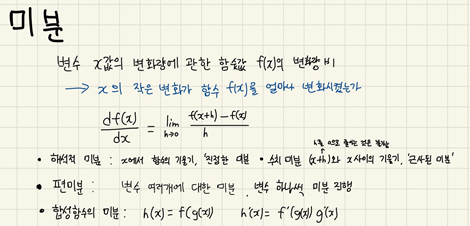

# 미분

In [7]:
def num_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x)) / h

In [8]:
# 주의
# h에 너무 작은 값 사용하면 반올림 오차 문제 생김
np.float32(1e-50)

0.0

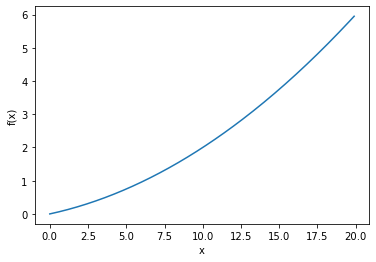

5일때의 미분값


0.20000099999917254

In [9]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

print("5일때의 미분값")
num_diff( function_1, 5 )

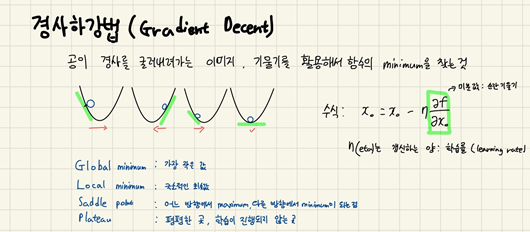

# 경사 하강법(Gradient Decent)

In [10]:
# 미분 기울기 구하는 함수
# 여기에 numpy 행렬 집어넣을 수 있음

def num_grad(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같고 원소가 모두 0인 배열 생성
    
    for idx in range(x.size):

        # 기존 x 값을 보관
        temp = x[idx]

        # f(x+h) 계산
        x[idx] = temp + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = temp - h
        fxh2 = f(x)
        
        # 그리고 기울기 계산
        grad[idx] = (fxh1 - fxh2) / (2*h)

        # 다시 x를 원래대로
        x[idx] = temp
        
    return grad

In [11]:
# f: 최적화하려는 함수, init_x: 초깃값
# lr: 학습률, step_num: 반복횟수
# gradient decent 를 통해 global minimum 찾는 함수

def gd( f, init_x, lr=0.01, step_num=100 ):
    x = init_x

    for i in range(step_num):
        grad = num_grad(f, x)
        x -= lr * grad
        plt.scatter(x[0], x[1])

    return x

[-6.11110793e-10  8.14814391e-10]


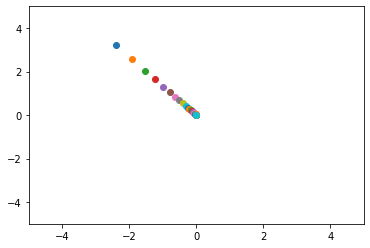

global minimum (0,0) 찾음


In [12]:
# 위에서 정의한 함수 실행
# y = x^2의 global minimum 찾기

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

plt.xlim(-5, 5)
plt.ylim(-5, 5)

result = gd( function_2, init_x=init_x, lr=0.1, step_num=100 )

print(result)

plt.show()

print("global minimum (0,0) 찾음")

# 은닉층 하나의 신경망 구현

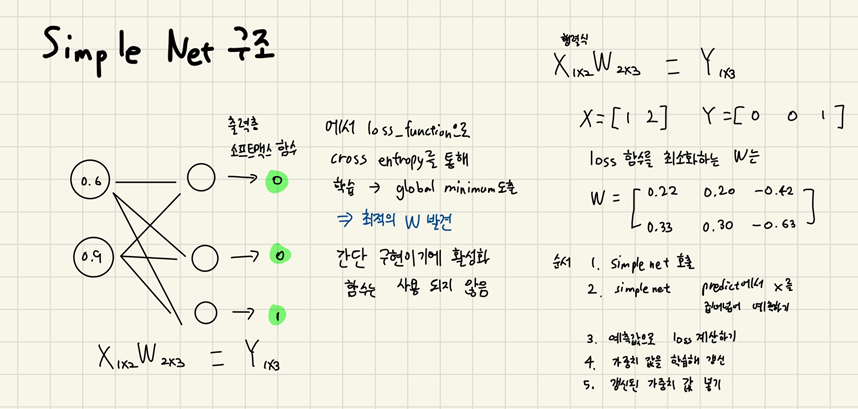

In [13]:
class SimpleNet:
    def __init__(self):
        # 시드 고정해둠
        np.random.seed(0)
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        # 중첩 함수로 softmax 함수 넣어줌
        def softmax(a):
            if a.ndim >= 2:
                a = a.reshape( -1, a.shape[-1] )
                c = np.max( a, axis=1, keepdims=True )
                exp_a = np.exp(a - c)
                sum_exp_a = np.sum( exp_a, axis=1, keepdims=True )
            else:
                c = np.max(a)
                exp_a = np.exp(a - c)
                sum_exp_a = np.sum(exp_a)

            y = exp_a / sum_exp_a

            return y
        return softmax( np.dot(x, self.W) )
    
    def loss(self, x, y):
        y_hat = self.predict(x)
        
        # 중첩 함수로 cross entropy 넣어줌
        def ce_loss( y_hat, y ):
            delta = 1e-7
            # log(0)이 나와 무한대가 되지 않도록 delta를 더함
            return - np.sum( y * np.log(y_hat + delta) )
        
        loss = ce_loss(y_hat, y)
        
        return loss

    def num_grad(self, x, y):
        h = 1e-4
        # slef.W랑 같은 size의 0행렬 만들기
        grad = np.zeros_like( self.W )

        for idx, val in np.ndenumerate( self.W ):

            temp = self.W[idx]

            self.W[idx] = temp + h
            fxh1 = self.loss(x, y)

            self.W[idx] = temp - h
            fxh2 = self.loss(x, y)
            
            grad[idx] = (fxh1 - fxh2) / (2*h)

            self.W[idx] = temp
            
        return grad

In [14]:
# 여기서는 가중치만 갱신하고
# 이를 바탕으로 simple net을 갱신하지는 않음

net = SimpleNet()
print("랜덤 가중치")
print(net.W)
print("*"*30)

x = np.array([0.6, 0.9])
p = net.predict(x)
print("랜덤 가중치로 예측")
print(p)
print("*"*30)

y = np.array([0, 0, 1]) # 정답 레이블
print("랜덤 가중치로 예측한 손실함수")
print(net.loss(x, y))
print("*"*30)

dW = net.num_grad(x, y)
print("갱신된 가중치 값")
print(dW)

랜덤 가중치
[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]]
******************************
랜덤 가중치로 예측
[0.74088333 0.23357527 0.0255414 ]
******************************
랜덤 가중치로 예측한 손실함수
3.6674507891066104
******************************
갱신된 가중치 값
[[ 0.44452826  0.14014461 -0.58467287]
 [ 0.66679239  0.21021692 -0.87700931]]


### 새로운 가중치로 학습을 진행해본 결과 다음과 같음
##### 너무 많은 양을 차지해 결과만 적어둠


1. 손실함수: 3.67 -> 2.53
2. [0.74088333 0.23357527 0.0255414 ] -> [0.59285153 0.32746981 0.07967866]
    
    맨 마지막 인덱스가 정답인데 그 확률이 증가함

# MNIST 손글씨 실습

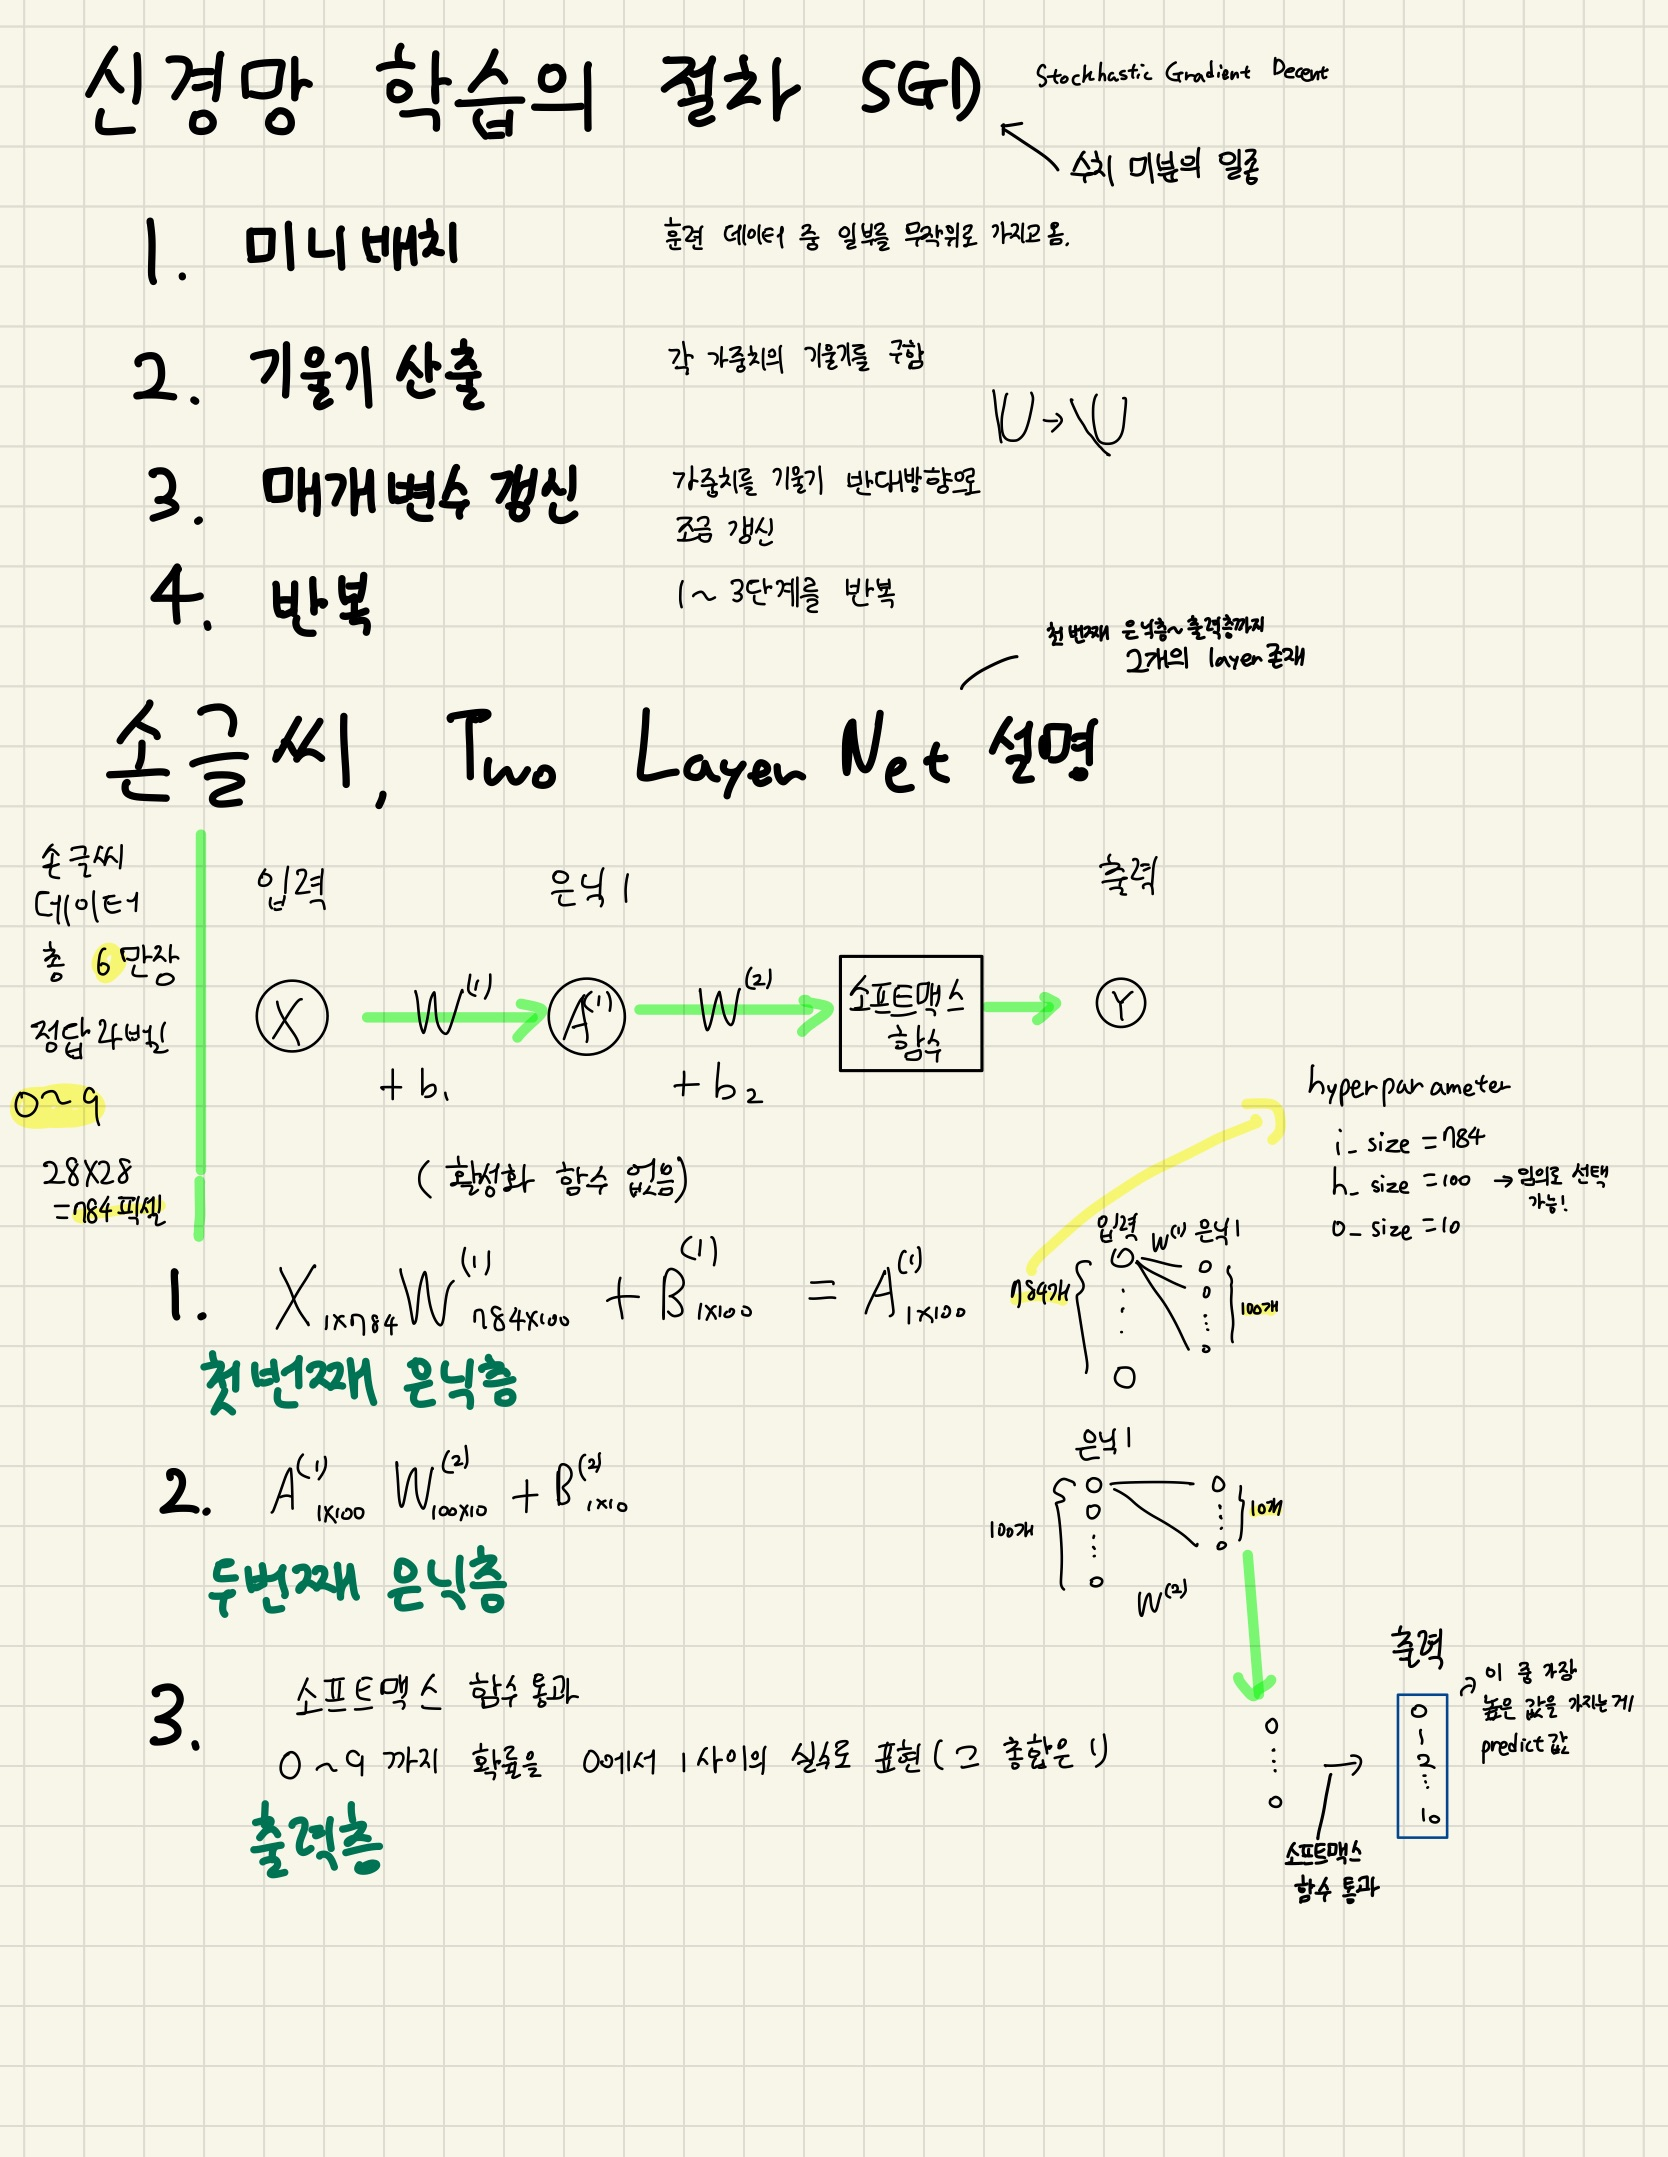

### 네트워크 정의

In [15]:
# 은닉층 2개인 신경망 생성
class TwoLayerNet:
    # h_size는 은닉층의 layer 개수
    # o_size는 출력층의 layer 개수
    def __init__(self, i_size, h_size, o_size, init_std=0.01):
        # 랜덤 값으로 가중치 초기화하고 dictionary에 넣어두기
        self.params = {}
        self.params['W1'] = init_std * np.random.randn(i_size, h_size)
        self.params['b1'] = np.zeros(h_size)
        self.params['W2'] = init_std * np.random.randn(h_size, o_size)
        self.params['b2'] = np.zeros(o_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        return softmax(a2)
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return ce_loss( y_hat, y )
    
    def accuracy(self, x, y):
        y_hat = self.predict(x)
        y_hat = np.argmax(y_hat, axis=1)
        y = np.argmax(y, axis=1)
        accuracy = np.sum(y_hat == y) / float(x.shape[0])
        return accuracy
        
    def num_grad(self, x, y):
        h = 1e-4
        grads = {}

        for key in ('W1', 'b1', 'W2', 'b2'):
            w = self.params[key]
            grad = np.zeros_like( w )
        
            for idx, val in np.ndenumerate( w ):
                temp = w[idx]

                w[idx] = temp + h
                fxh1 = self.loss(x, y)
                w[idx] = temp - h
                fxh2 = self.loss(x, y)
                grad[idx] = (fxh1 - fxh2) / (2*h)

                w[idx] = temp
            
            grads[key] = grad

        return grads

### 손글씨 데이터 불러오고 필요한 함수 정의
함수는 필요하면 중첩함수로 저장해두어도 됨

In [16]:
import numpy as np
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.values.astype(np.uint8) / 255
y = y.values.astype(np.uint8)

# one-hot encoding
y = np.eye(10)[y]

x_train = X[:60000]
x_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    if a.ndim >= 2:
        a = a.reshape( -1, a.shape[-1] )
        c = np.max( a, axis=1, keepdims=True )
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum( exp_a, axis=1, keepdims=True )
    else:
        c = np.max(a)
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum(exp_a)

    y = exp_a / sum_exp_a

    return y

def ce_loss( y_hat, y ):
    if y_hat.ndim == 1:
        y = y.reshape(1, y.size)
        y_hat = y_hat.reshape(1, y_hat.size)
    
    batch_size = y_hat.shape[0]
    return - np.sum( y * np.log(y_hat + 1e-7)) / batch_size

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


### loss값, train, test 정확도 저장 리스트 생성
### 반복 횟수, 배치 크기, 학습 크기, learning rate 설정

In [17]:
import numpy as np

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 5000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

# 1 epoch 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
# 1 epoch 당 600번 반복됨

# h_size는 첫번째 은닉층 layer 개수
# o_size는 출력층 layer 개수
network = TwoLayerNet(i_size=784, h_size=100, o_size=10)

In [18]:
iter_per_epoch

600.0

In [19]:
# 위에 iters_num을 5000으로 설정 - 5천번 반복
# 시간이 오래 걸려 중간에 중단

for i in range(iters_num):
    # 미니배치 획득
    # 배치는 위에서 100개씩 끊기로 함
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    # 기울기 계산
    grad = network.num_grad(x_batch, y_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    # 정확도 출력

    # if i % iter_per_epoch == 0: # 1 epoch 당 출력
    if True: # 매 배치마다 출력
        train_acc = network.accuracy(x_train, y_train)
        test_acc = network.accuracy(x_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc {} | test acc {}'.format(train_acc, test_acc))

train acc 0.09871666666666666 | test acc 0.098
train acc 0.09915 | test acc 0.1009
train acc 0.0993 | test acc 0.1032
train acc 0.09915 | test acc 0.1009
train acc 0.10441666666666667 | test acc 0.1028
train acc 0.10441666666666667 | test acc 0.1028
train acc 0.10441666666666667 | test acc 0.1028
train acc 0.10441666666666667 | test acc 0.1028
train acc 0.10441666666666667 | test acc 0.1028


KeyboardInterrupt: 